In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv(r'C:\Users\GT1030\Downloads\train.csv')
test = pd.read_csv(r'C:\Users\GT1030\Downloads\test.csv')

In [3]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())
train.head()

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


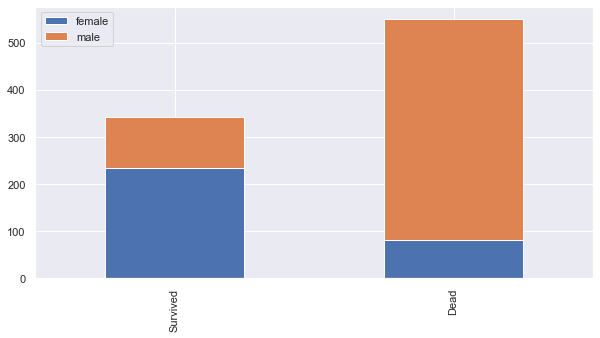

In [4]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    
bar_chart('Sex')

In [6]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train.groupby('Pclass')['Embarked'].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [28]:
train['Embarked'].fillna('S',inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train_test = [train,test]
for dataset in train_test:
    dataset = dataset.sort_values(['Ticket'],ascending=True).reset_index(drop=True)
train.loc[train['Embarked'].isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
test = test.sort_values('Ticket',ascending=True).reset_index(drop=True)

In [25]:
train.iloc[35:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
35,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
36,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
37,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
38,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
39,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
40,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
41,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
42,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
43,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
44,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S


In [26]:
train.groupby('Sex')['Embarked'].value_counts()

Sex     Embarked
female  S           203
        C            73
        Q            36
male    S           441
        C            95
        Q            41
Name: Embarked, dtype: int64

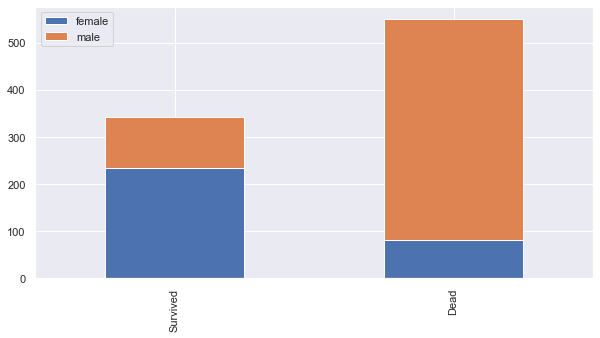

In [29]:
bar_chart('Sex')

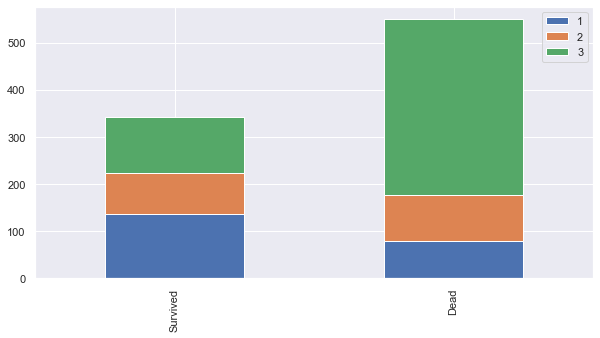

In [30]:
bar_chart('Pclass')

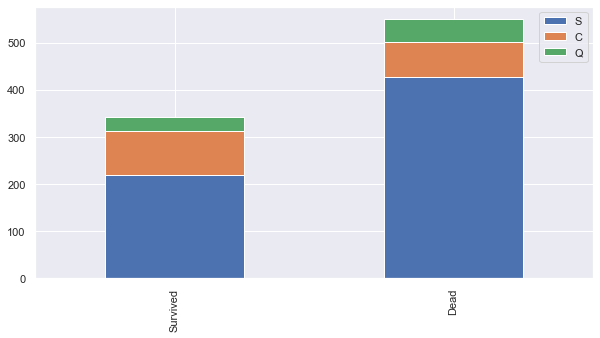

In [45]:
bar_chart('Embarked')

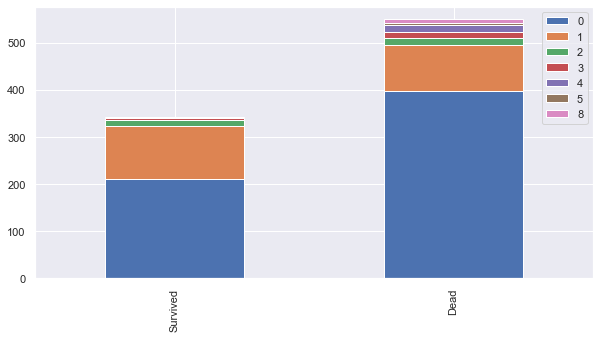

In [33]:
bar_chart('SibSp')

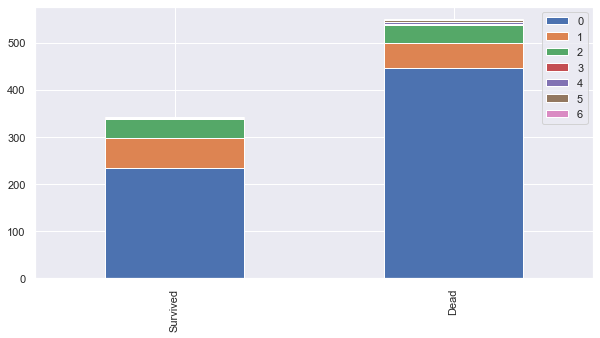

In [34]:
bar_chart('Parch')

In [36]:
train_test = [train,test]
for dataset in train_test:
    dataset['PS'] = dataset['SibSp'] + dataset['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PS
0,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S,0
1,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S,0
2,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S,0
3,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,2
4,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,2


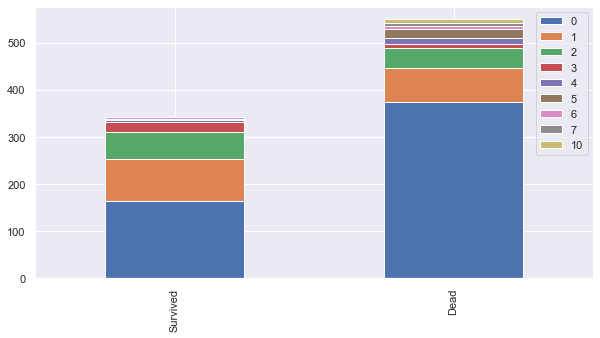

In [37]:
bar_chart('PS')

In [39]:
for dataset in train_test:
    del dataset['SibSp']
    del dataset['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,PS
0,505,1,1,"Maioni, Miss. Roberta",female,16.0,110152,86.50,B79,S,0
1,258,1,1,"Cherry, Miss. Gladys",female,30.0,110152,86.50,B77,S,0
2,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,110152,86.50,B77,S,0
3,263,0,1,"Taussig, Mr. Emil",male,52.0,110413,79.65,E67,S,2
4,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,110413,79.65,E67,S,2


In [42]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,PS
0,505,1,1,"Maioni, Miss. Roberta",female,16.0,110152,86.5000,B79,S,0
1,258,1,1,"Cherry, Miss. Gladys",female,30.0,110152,86.5000,B77,S,0
2,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,110152,86.5000,B77,S,0
3,263,0,1,"Taussig, Mr. Emil",male,52.0,110413,79.6500,E67,S,2
4,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,110413,79.6500,E67,S,2
5,586,1,1,"Taussig, Miss. Ruth",female,18.0,110413,79.6500,E68,S,2
6,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,110465,52.0000,C110,S,0
7,476,0,1,"Clifford, Mr. George Quincy",male,NaN,110465,52.0000,A14,S,0
8,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,110564,26.5500,C52,S,0
9,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,110813,75.2500,D37,C,1


In [44]:
train[train['PS']==0].groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,86.0,41.005814,13.857360,16.0,30.0,38.5,49.75,80.0
2,93.0,33.736559,12.442387,16.0,24.0,31.0,40.00,70.0
3,225.0,28.235556,10.788659,5.0,21.0,26.0,32.00,74.0


In [46]:
train[train['Pclass']==1].groupby('Embarked')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,74.0,38.027027,14.243454,16.00,25.00,36.5,49.00,71.0
Q,2.0,38.500000,7.778175,33.00,35.75,38.5,41.25,44.0
S,110.0,38.367455,15.343864,0.92,28.25,37.5,48.00,80.0


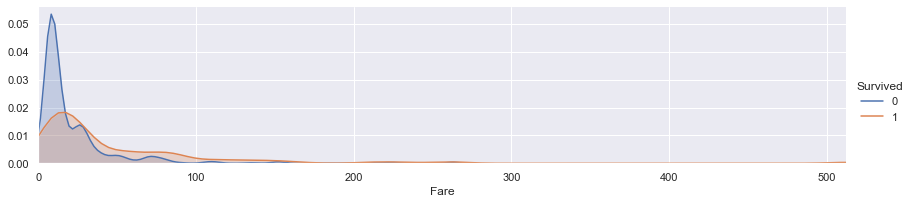

In [47]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

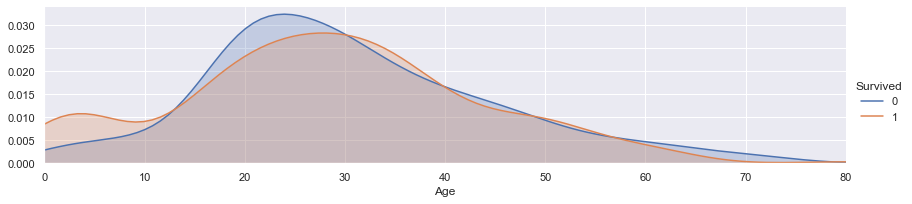

In [48]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

In [49]:
for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract('([a-zA-Z]+)[.]')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,PS,Title
0,505,1,1,"Maioni, Miss. Roberta",female,16.0,110152,86.50,B79,S,0,Miss
1,258,1,1,"Cherry, Miss. Gladys",female,30.0,110152,86.50,B77,S,0,Miss
2,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,110152,86.50,B77,S,0,Countess
3,263,0,1,"Taussig, Mr. Emil",male,52.0,110413,79.65,E67,S,2,Mr
4,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,110413,79.65,E67,S,2,Mrs


In [50]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Countess      1
Capt          1
Jonkheer      1
Sir           1
Mme           1
Ms            1
Lady          1
Name: Title, dtype: int64

In [51]:
train.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.000,70.0,70.00,70.0
Col,2.0,58.000000,2.828427,56.00,57.000,58.0,59.00,60.0
Countess,1.0,33.000000,NaN,33.00,33.000,33.0,33.00,33.0
Don,1.0,40.000000,NaN,40.00,40.000,40.0,40.00,40.0
Dr,6.0,42.000000,12.016655,23.00,35.000,46.5,49.75,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.000,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.000,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.750,48.5,50.25,52.0
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0


In [56]:
train.loc[train['Age'].isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,PS,Title
7,476,0,1,"Clifford, Mr. George Quincy",male,NaN,110465,52.00,A14,S,0,Mr
16,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,111427,26.55,NaN,S,0,Mr
19,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,112052,0.00,NaN,S,0,Mr
21,816,0,1,"Fry, Mr. Richard",male,NaN,112058,0.00,B102,S,0,Mr
24,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,112379,39.60,NaN,C,0,Dr
...,...,...,...,...,...,...,...,...,...,...,...,...
855,564,0,3,"Simmons, Mr. John",male,NaN,SOTON/OQ 392082,8.05,NaN,S,0,Mr
856,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,SOTON/OQ 392086,8.05,NaN,S,0,Mr
880,784,0,3,"Johnston, Mr. Andrew G",male,NaN,W./C. 6607,23.45,NaN,S,3,Mr
881,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.45,NaN,S,3,Miss


In [58]:
train[(train['Age'].isnull())&(train['Title']=='Master')]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,PS,Title
262,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,2661,15.2458,NaN,C,2,Master
263,66,1,3,"Moubarek, Master. Gerios",male,NaN,2661,15.2458,NaN,C,2,Master
630,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,4133,25.4667,NaN,S,4,Master
736,160,0,3,"Sage, Master. Thomas Henry",male,NaN,CA. 2343,69.5500,NaN,S,10,Master


In [54]:
train[train['Age']<=12]['Title'].unique()

array(['Master', 'Miss', 'Mr'], dtype=object)

In [57]:
train.loc[train['Age'].isnull(),:]['Title'].unique()

array(['Mr', 'Dr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [71]:
train[(train['Age'].isnull())&(train['Title']=='Master')]['Age'].fillna(12,inplace=True)

C:\Users\GT1030\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [70]:
train[(train['Age'].isnull())&(train['Title']=='Master')]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,PS,Title
262,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,2661,15.2458,NaN,C,2,Master
263,66,1,3,"Moubarek, Master. Gerios",male,NaN,2661,15.2458,NaN,C,2,Master
630,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,4133,25.4667,NaN,S,4,Master
736,160,0,3,"Sage, Master. Thomas Henry",male,NaN,CA. 2343,69.5500,NaN,S,10,Master


In [72]:
test.loc[test['Fare'].isnull(),:]

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,PS,Title
270,1044,3,"Storey, Mr. Thomas",male,60.5,3701,NaN,NaN,S,0,Mr


In [74]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154688
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [76]:
test['Fare'].fillna(13.675550,inplace=True)
test.iloc[270]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
Ticket                       3701
Fare                      13.6755
Cabin                         NaN
Embarked                        S
PS                              0
Title                          Mr
Name: 270, dtype: object

In [77]:
train_test = [train,test]
for dataset in train_test:
    dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('median'),inplace=True)
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     891 non-null    object 
 10  PS           891 non-null    int64  
 11  Title        891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [80]:
for dataset in train_test:
    dataset['Cabinn'] = dataset['Cabin'].str[0]
train.groupby('Pclass')['Cabinn'].value_counts()

Pclass  Cabinn
1       C         59
        B         47
        D         29
        E         25
        A         15
        T          1
2       F          8
        D          4
        E          4
3       F          5
        G          4
        E          3
Name: Cabinn, dtype: int64

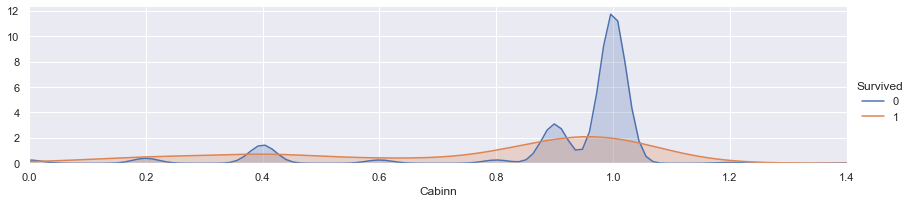

In [81]:
cabin_mapping = {"A":0, "B":0.2,"C":0.4,"D":0.6,"E":0.8,"F":1,"G":1.2,"T":1.4}
for dataset in train_test:
    dataset['Cabinn'] = dataset['Cabinn'].map(cabin_mapping)
train['Cabinn'].fillna(train.groupby("Pclass")['Cabinn'].transform('median'),inplace=True)
test['Cabinn'].fillna(test.groupby("Pclass")['Cabinn'].transform('median'),inplace=True)

facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Cabinn',shade=True)
facet.set(xlim=(0,train['Cabinn'].max()))
facet.add_legend()

plt.show()

In [84]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     891 non-null    object 
 10  PS           891 non-null    int64  
 11  Title        891 non-null    object 
 12  Cabinn       891 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 90.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

In [83]:
train['Age'].fillna(train.groupby("Title")['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby("Title")['Age'].transform('median'),inplace=True)

In [85]:
train_test = [train,test]
for dataset in train_test:
    del dataset['Cabin']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   PS           891 non-null    int64  
 10  Title        891 non-null    object 
 11  Cabinn       891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [87]:
for dataset in train_test:
    del dataset['Name']
    del dataset['Ticket']
    del dataset['Title']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   PS           891 non-null    int64  
 8   Cabinn       891 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 62.8+ KB


In [88]:
for dataset in train_test:
    sex = dataset.pop('Sex')
    dataset['Male'] = (sex=='male')*1.0
    dataset['Female'] = (sex=='female')*1.0
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,PS,Cabinn,Male,Female
0,505,1,1,16.0,86.50,S,0,0.2,0.0,1.0
1,258,1,1,30.0,86.50,S,0,0.2,0.0,1.0
2,760,1,1,33.0,86.50,S,0,0.2,0.0,1.0
3,263,0,1,52.0,79.65,S,2,0.8,1.0,0.0
4,559,1,1,39.0,79.65,S,2,0.8,0.0,1.0


In [89]:
train['Embarked'].uniqueue()

array(['S', 'C', 'Q'], dtype=object)

In [90]:
embark_map = {'S':0,'C':1,'Q':2}
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embark_map)
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,PS,Cabinn,Male,Female
0,505,1,1,16.0,86.50,0,0,0.2,0.0,1.0
1,258,1,1,30.0,86.50,0,0,0.2,0.0,1.0
2,760,1,1,33.0,86.50,0,0,0.2,0.0,1.0
3,263,0,1,52.0,79.65,0,2,0.8,1.0,0.0
4,559,1,1,39.0,79.65,0,2,0.8,0.0,1.0


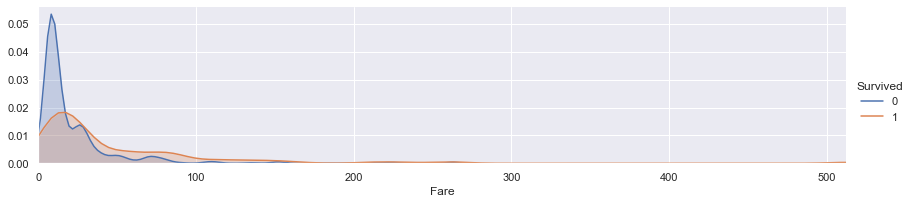

In [94]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

In [95]:
#비닝
train_test = [train,test]
for dataset in train_test:
    dataset.loc[ dataset['Fare'] < 18 , 'Fare'] = 0,
    dataset.loc[ dataset['Fare'] >= 18 , 'Fare'] = 1
train.head()
#원-핫 인코딩
train_test = [train,test]
for dataset in train_test:
    target = dataset.pop('Fare')
    dataset['Low_Fare'] = (target < 18)*1.0
    dataset['High_Fare'] = (target >= 18)*1.0
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,PS,Cabinn,Male,Female
0,505,1,1,16.0,1.0,0,0,0.2,0.0,1.0
1,258,1,1,30.0,1.0,0,0,0.2,0.0,1.0
2,760,1,1,33.0,1.0,0,0,0.2,0.0,1.0
3,263,0,1,52.0,1.0,0,2,0.8,1.0,0.0
4,559,1,1,39.0,1.0,0,2,0.8,0.0,1.0


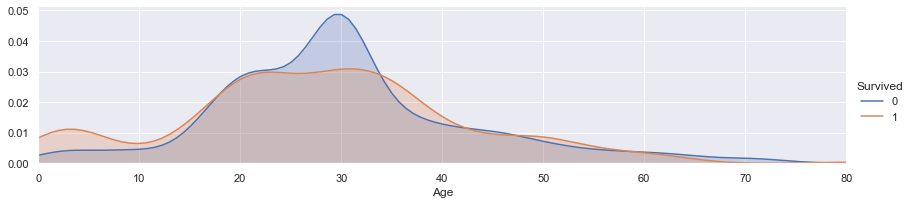

In [96]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

In [97]:
train_test = [train,test]
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 18 , 'Age'] = 0,
    dataset.loc[ (dataset['Age'] > 18)&(dataset['Age'] <= 22) , 'Age'] = 0.5,
    dataset.loc[ (dataset['Age'] > 22)&(dataset['Age'] <= 33) , 'Age'] = 1,
    dataset.loc[ (dataset['Age'] > 33)&(dataset['Age'] <= 45) , 'Age'] = 1.5,
    dataset.loc[ dataset['Age'] > 45 , 'Age'] = 2
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,PS,Cabinn,Male,Female
0,505,1,1,0.0,1.0,0,0,0.2,0.0,1.0
1,258,1,1,1.0,1.0,0,0,0.2,0.0,1.0
2,760,1,1,1.0,1.0,0,0,0.2,0.0,1.0
3,263,0,1,2.0,1.0,0,2,0.8,1.0,0.0
4,559,1,1,1.5,1.0,0,2,0.8,0.0,1.0


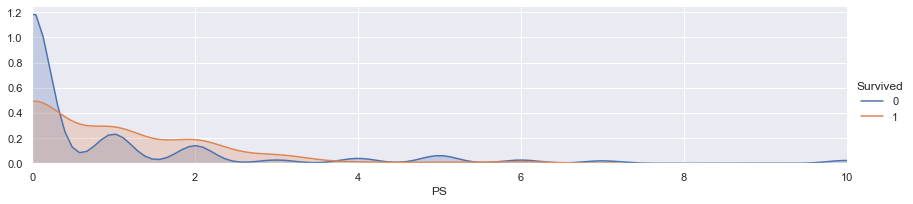

In [98]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'PS',shade=True)
facet.set(xlim=(0,train['PS'].max()))
facet.add_legend()

In [99]:
train_test = [train,test]
for dataset in train_test:
    dataset.loc[ dataset['PS'] > 3 , 'PS'] = 4
    
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,PS,Cabinn,Male,Female
0,505,1,1,0.0,1.0,0,0,0.2,0.0,1.0
1,258,1,1,1.0,1.0,0,0,0.2,0.0,1.0
2,760,1,1,1.0,1.0,0,0,0.2,0.0,1.0
3,263,0,1,2.0,1.0,0,2,0.8,1.0,0.0
4,559,1,1,1.5,1.0,0,2,0.8,0.0,1.0


In [100]:
for dataset in train_test:
    del dataset['PassengerId']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int64  
 5   PS        891 non-null    int64  
 6   Cabinn    891 non-null    float64
 7   Male      891 non-null    float64
 8   Female    891 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


In [104]:
target = train.pop('Survived')

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [105]:
knn = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(knn, train, target , cv=k_fold, scoring=scoring)
print(score)

[0.81111111 0.76404494 0.85393258 0.7752809  0.80898876 0.79775281
 0.80898876 0.80898876 0.79775281 0.78651685]


In [108]:
round(sum(score)/len(score)*100,2)

80.13

In [109]:
dt = DecisionTreeClassifier()
score = cross_val_score(dt, train, target, cv=k_fold, scoring=scoring)
print(score)
round(sum(score)/len(score)*100,2)

[0.76666667 0.82022472 0.86516854 0.75280899 0.83146067 0.7752809
 0.79775281 0.87640449 0.75280899 0.83146067]


80.7

In [110]:
rf = RandomForestClassifier(n_estimators=100, bootstrap=True)
score = cross_val_score(rf,train,target,cv=k_fold, scoring=scoring)
print(score)
round(sum(score)/len(score)*100,2)

[0.74444444 0.79775281 0.85393258 0.76404494 0.83146067 0.79775281
 0.80898876 0.86516854 0.80898876 0.78651685]


80.59

In [111]:
clf = SVC()
score = cross_val_score(clf,train,target,cv=k_fold, scoring=scoring)
print(score)
round(sum(score)/len(score)*100,2)

[0.8        0.82022472 0.83146067 0.79775281 0.80898876 0.85393258
 0.82022472 0.84269663 0.83146067 0.75280899]


81.6

In [120]:
clf = SVC()
clf.fit(train, target)

prediction = rf.predict(test)

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   Fare      418 non-null    float64
 3   Embarked  418 non-null    int64  
 4   PS        418 non-null    int64  
 5   Cabinn    418 non-null    float64
 6   Male      418 non-null    float64
 7   Female    418 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.2 KB


In [123]:
test = pd.read_csv(r'C:\Users\GT1030\Downloads\test.csv')
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = prediction
submission.to_csv(r'C:\Users\GT1030\Downloads\submission.csv',header=True,index=False)

In [122]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
